## 实验：激活函数

### 实验概要

#### 神经网络

感知机（包括多层感知机）的优势在于即便对于复杂的函数，感知机也隐含着能够表示它的可能性。而其局限在于设定权重的工作，即确定合适的、能符合预期的输入与输出的权重，现在还是由人工进行的。神经网络的出现，就是为了解决感知机的局限性。具体地讲，神经网络的一个重要性质是它可以自动地从数据中学习到合适的权重参数。神经网络表示图如下：

<img src="./img/1_03.png" width="50%">

我们把最左边的一列称为输入层，最右边的一列称为 **输出层**，中间的一列称为 **中间层**。**中间层** 有时也称为 **隐藏层**。**隐藏** 的意思是，隐藏层的神经元（和输入层、输出层不同）肉眼看不见。

#### 激活函数

激活函数是连接感知机和神经网络的桥梁。

此前，我们使用了 **阶跃函数** 作为 **激活函数** ——

$$
h(x)=\left\{\begin{array}{ll}
0 & (x \leqslant 0) \\
1 & (x>0)
\end{array}\right.
$$

它会将输入信号的总和转换为输出信号，在输入超过 `0` 时返回 `1`，否则返回 `0`。因此，正如 **激活** 一词所示，激活函数的作用在于决定如何来激活输入信号的总和。因此，如果将上式写得详细一点，则可以分成下面两个式子。

$$
\begin{array}{c}
a=b+w_{1} x_{1}+w_{2} x_{2} \\
y=h(a)
\end{array}
$$

首先，计算加权输入信号和偏置的总和，记为 **a** 。然后，用 **h()** 函数将 **a** 转换为输出 **y**，如下图，我们将其称为 **神经元**：

<img src="./img/2_03.png" width="40%">

到目前，可以说感知机中都是使用了 **阶跃函数** 作为 **激活函数** 。也就是说，在 **激活函数** 的众多候选中，感知机使用了 **阶跃函数**。那么，如果感知机使用其他函数作为激活函数的话会怎么样呢？实际上，如果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了。在处理简单的线性可分的数据集的时候，我们仅仅依靠线性分类器就可以解决问题。但是，实际生活中的绝大多数的场景并不是这样简单的，那么简单的线性分类器就没有办法起到很好的效果了。

<img src="./img/3_03.png" width="60%">

此时，常用的处理手段有两种：

1. 借助于转化策略，将低维空间线性不可分的数据映射到高维空间中，使得其变得线性可分，此时依旧可以基于线性分类器完成建模处理，例如：**SVM**
2. 引入 **激活函数**，让模型能够学习非线性的复杂映射关系，这样得到的模型也能够处理复杂的问题。一个好的激活函数能够提升模型的表达能力。

### 实验目标

本实验将向你介绍更多常用的神经网络激活函数，并且通过 Python 绘制它们的函数图形。大致上，激活函数可以分为两类：饱和与非饱和 ——

- **饱和** 激活函数：sigmoid、tanh
- **非饱和** 激活函数: ReLU、Leaky Relu、ELU、PReLU、RReLU

<img src="./img/4_03.png" width="50%">

当一个激活函数 **h(x)** 满足以下条件，**n** 趋于正无穷，称为 **右饱和**：

$$
\lim _{n \rightarrow+\infty} h^{\prime}(x)=0
$$

当一个激活函数 **h(x)** 满足以下条件，**n** 趋于负无穷，称为 **左饱和**：

$$
\lim _{n \rightarrow-\infty} h^{\prime}(x)=0
$$

当一个激活函数，既满足左饱和又满足又饱和时，我们称之为 **饱和**。相对于 **饱和** 激活函数，使用 **非饱和激活函数** 的优势在于**非饱和激活函数** 能解决深度神经网络的 **梯度消失** 问题，同时，它能加快收敛速度 。

### 1. Sigmoid 函数

当神经网络中用 **sigmoid** 函数作为激活函数，进行信号的转换，转换后的信号被传送给下一个神经元。实际上，之前介绍的感知机和接下来要介绍的神经网络的主要区别就在于这个 **激活函数**。其他方面，比如神经元的多层连接的构造、信号的传递方法等，基本上和感知机是一样的。**sigmoid** 函数，用于隐层神经元输出，取值范围为 (0,1)，它可以将一个实数映射到 (0,1) 的区间，可以用来做二分类，公式如下：

$$sigmoid=\delta(x)={\frac{1}{1+e^{-x}}}$$

**sigmoid** 的导数如下：

$$\delta^{'}(x)={\frac{e^{-x}}{(1+e^{-x})^2}}=\delta(x)(1-\delta(x))$$

**sigmoid** 的特点：它能够把输入的连续实值变换为 0 和 1 之间的输出，特别的 ——

- 如果是非常大的负数，输出就是无限接近 0
- 如果是非常大的正数，输出就是无限接近 1

对于二分类问题，输出层使用 **sigmoid** 函数更优。**sigmoid** 函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的 **ReLU** 函数取代。

**sigmoid** 的优点：

- 输出值在 0-1 之间，以标准化每个神经元的输出
- 渐变平滑可以防止渐变跳跃
- 当输入值的绝对值大于 2 时，该函数趋向于将其带到曲线的边缘，从而产生清晰的预测

**sigmoid** 的缺点：

- 对于较大或较小的输入，当梯度接近 0 时，无法更新参数，并且梯度将消失
- 对于任何输入而言，不是以零为中心，梯度参数（W）要么为正、要么为负（可以从反向传播公式获得），这将导致缓慢的梯度更新和缓慢的模型收敛
- 由于存在索引计算，因此计算量相对较大

#### 绘制 sigmoid 函数

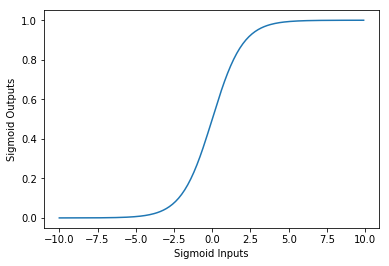

In [1]:
# 导入numpy科学运算库
import numpy as np  
# 导入matplotlib绘图库
import matplotlib.pyplot as plt     

# 魔法指令，让matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

# 定义sigmoid函数
def sigmoid(x):
    return 1.0/(1+np.exp(-x))             
 
# 参数: 起点，终点，间距
sigmoid_inputs = np.arange(-10,10,0.1)    
sigmoid_outputs = sigmoid(sigmoid_inputs)
 
plt.plot(sigmoid_inputs,sigmoid_outputs)
plt.xlabel("Sigmoid Inputs")
plt.ylabel("Sigmoid Outputs")
plt.show()

#### sigmoid 函数和阶跃函数的比较

首先注意到的是“平滑性”的不同。 **sigmoid** 函数是一条平滑的曲线，输出随着输入发生连续性的变化。而 **阶跃函数** 以 0 为界，输出发生急剧性的变化。 **sigmoid** 函数的平滑性对神经网络的学习具有重要意义。另一个不同点是，相对于 **阶跃函数** 只能返回 0 或 1，**sigmoid** 函数可以返
回 0.731... 0.880... 等实数（这一点和刚才的平滑性有关）。也就是说，**感知机** 中神经元之间流动的是 0 或 1 的二元信号，而 **神经网络** 中流动的是连续的实数值信号。

<img src="./img/step_sigmoid_03.png" width="80%">

### 2. Tanh 函数

可以将 **Tanh** 理解为 **sigmoid** 函数的升级版，**sigmoid** 函数的缺点是它不关于零点（原点）对称。因此，我们对 **sigmoid** 函数进行平移，使其中心对称，得到 **Tanh** 函数，其表现比 **sigmoid** 函数更好。**Tanh** 是双曲函数中的一个，tanh() 为双曲正切。在数学中，双曲正切 **Tanh** 是由双曲正弦和双曲余弦这两种基本双曲函数推导而来。 **Tanh** 的定义域为实数集，值域为 (-1,1)。**Tanh** 是一个奇函数，其函数图像为过原点并且穿越 Ⅰ、Ⅲ 象限的严格单调递增曲线，其图像被限制在两水平渐近线 y=1 和 y=-1 之间。公式如下：

$$tanh(x)=\frac{sinh(x)}{cosh(x)}=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

**Tanh** 的导数为：

$$tanh^{'}(x)=1-tanh^{2}(x)$$

#### 绘制 tanh 函数

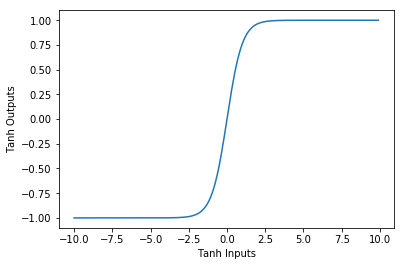

In [2]:
# 导入numpy科学运算库
import numpy as np                  
# 导入matplotlib绘图库
import matplotlib.pyplot as plt     

# 魔法指令，让matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

# 定义tanh函数
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)) 
 
# 参数: 起点，终点，间距
tanh_inputs = np.arange(-10,10,0.1)   
tanh_outputs = tanh(tanh_inputs)
 
plt.plot(tanh_inputs,tanh_outputs)
plt.xlabel("Tanh Inputs")
plt.ylabel("Tanh Outputs")
plt.show()

### 3. ReLu 函数

在神经网络发展的历史上，**sigmoid** 函数很早就开始被使用了，而最近则主要使用 **ReLU** 线性整流函数（**Rectified Linear Unit, ReLU**），又称修正线性单元，是一种人工神经网络中常用的激活函数。**Tanh** 函数与 **sigmoid** 函数共同的缺点: 当它们倾向于比较大或者比较小的数的时候，整个函数的变化比较平缓，会影响到网络的学习效率。所以，在实际工作中用得更多的是 **ReLU** 函数。**ReLU** 的定义域为实数集，值域为 ${[0,+\infty)}$ 。公式如下：

$$Relu=max(0,x)$$

**ReLU** 函数其实就是一个取最大值函数，注意这并不是全区间可导的，但是我们可以取次梯度。**ReLU** 虽然简单，但却是近几年的重要成果，有以下几大优点：
 
- 解决了梯度消失问题 (在正区间)
- 计算速度非常快，只需要判断输入是否大于 0
- 收敛速度远快于 **sigmoid** 和 **Tanh**

> **次梯度法** 是求解凸函数最优化（凸优化）问题的一种迭代法。次梯度法能够用于不可微的目标函数。当目标函数可微时，对于无约束问题次梯度法与梯度下降法具有同样的搜索方向。虽然在实际的应用中，次梯度法比内点法和牛顿法慢得多，但是次梯度法可以直接应用于更广泛的问题，次梯度法只需要很少的存储需求。然而，通过将次梯度法与分解技术结合，有时能够开发出问题的简单分配算法。

> **梯度消失问题**（Vanishing gradient problem）是一种机器学习中的难题，出现在以梯度下降法和反向传播训练人工神经网络的时候。在每次训练的迭代中，神经网络权重的更新值与误差函数的偏导数成比例，然而在某些情况下，梯度值会几乎消失，使得权重无法得到有效更新，甚至神经网络可能完全无法继续训练。

**ReLU 目前是最常用的激活函数，在搭建人工神经网络的时候推荐优先尝试！**

> 但 **ReLU** 也有缺点，尽管稀疏性可以提升计算高效性，但同样可能阻碍训练过程。通常，激活函数的输入值有一项偏置项 (**bias**)，假设 **bias** 变得太小，以至于输入激活函数的值总是负的，那么反向传播过程经过该处的梯度恒为 0，对应的权重和偏置参数此次无法得到更新。如果对于所有的样本输入，该激活函数的输入都是负的，那么该神经元再也无法学习，称为 **神经元死亡问题。**

#### 绘制 ReLu 函数

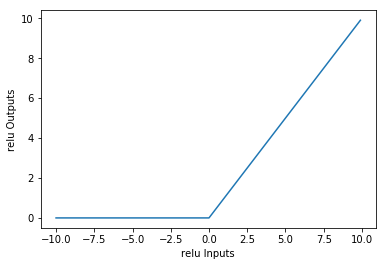

In [3]:
# 导入numpy科学运算库
import numpy as np                  
# 导入matplotlib绘图库
import matplotlib.pyplot as plt     

# 魔法指令，让matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

# 定义relu函数
def relu(x):
    return np.where(x < 0, 0, x)     
 
# 参数: 起点，终点，间距
relu_inputs = np.arange(-10,10,0.1)   
relu_outputs = relu(relu_inputs)
 
plt.plot(relu_inputs,relu_outputs)
plt.xlabel("relu Inputs")
plt.ylabel("relu Outputs")
plt.show()

### 4. Relu6 函数

观察上面的 **ReLu** 函数图形可以看到，由于 **ReLu** 函数的 **正半轴** 不施加任何非线性约束，因此当输入为 **正大数** 时，易引起 **正半轴** 的 **梯度爆炸**。因此，**Relu6** 应运而生，**Relu6** 函数是在 **ReLu** 基础上定义上界 **6**。**Relu6** 公式如下：

$$f(x)=min(max(0,x),6)$$

#### 绘制 ReLu6 函数

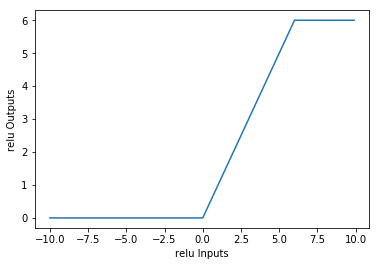

In [4]:
# 导入numpy科学运算库
import numpy as np                  
# 导入matplotlib绘图库
import matplotlib.pyplot as plt     

# 魔法指令，让matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

# 定义relu6函数
def relu(x):
    return np.where(x<6,(np.where(x < 0, 0, x)),6)     

# 参数: 起点，终点，间距
relu_inputs = np.arange(-10,10,0.1)   
relu_outputs = relu(relu_inputs)
 
plt.plot(relu_inputs,relu_outputs)
plt.xlabel("relu Inputs")
plt.ylabel("relu Outputs")
plt.show()

### 5. LeakyRelu 函数

**LeakyRelu** 函数是 **ReLU** 函数的改进，新增一个超参数 $\alpha$ ，以解决负半轴的死区问题。公式如下：

$$f(x) = \begin{cases}  
\alpha x & x < 0 \\
x & x > 0
\end{cases}$$

由于 $\alpha$ 通常被静态设置为 `0.01`，因此公式往往为：$$LeakyRelu(x)=max(0.01x, x)$$

**LeakyRelu** 的提出就是为了解决 **神经元死亡问题**，**LeakyRelu** 与 **ReLU** 很相似，仅在输入小于 0 的部分有差别，**ReLU** 输入小于 0 的部分值都为 0 ，而 **LeakyRelu** 输入小于 0 的部分，值为负，且有 **`微小`** 的斜度（**注意仔细看下面的函数图像**）。

#### 绘制 LeakyRelu 函数

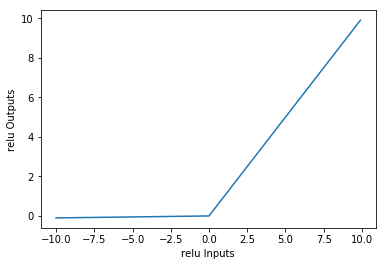

In [5]:
# 导入numpy科学运算库
import numpy as np                  
# 导入matplotlib绘图库
import matplotlib.pyplot as plt     

# 魔法指令，让matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

# 定义超参数 alpha 值
k=0.01                                
# 定义LeakyRelu函数
def relu(x):
    return np.where(x<0,k*x,x)       

# 参数: 起点，终点，间距
relu_inputs = np.arange(-10,10,0.1)   
relu_outputs = relu(relu_inputs)
 
plt.plot(relu_inputs,relu_outputs)
plt.xlabel("relu Inputs")
plt.ylabel("relu Outputs")
plt.show()

### 6. PRelu 函数

**PRelu** 函数是 **ReLU** 函数的另一个改进，他的数学形式如下 ——

$$PRelu(x)=max(\alpha x, x)$$

他是 **LeakyRelu** 的一般化方法，其中，$\alpha$ 是一个可学习的参数，带来的缺点就是需要多学习一个参数

#### 绘制 PRelu 函数

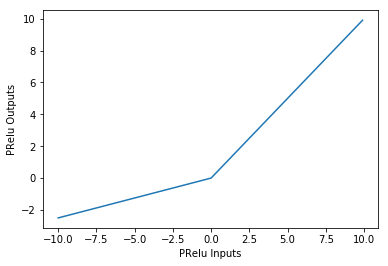

In [6]:
# 导入numpy科学运算库
import numpy as np                  
# 导入matplotlib绘图库
import matplotlib.pyplot as plt     

# 魔法指令，让matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

# 定义PRelu函数
def prelu(x):
    return np.where(x < 0, 0.25*x, x)  

# 参数: 起点，终点，间距
prelu_inputs = np.arange(-10,10,0.1)   
prelu_outputs = prelu(prelu_inputs)
 
plt.plot(prelu_inputs,prelu_outputs)
plt.xlabel("PRelu Inputs")
plt.ylabel("PRelu Outputs")
plt.show()

### 7. ELU 函数

**ELU** 函数是 **ReLU** 函数的又一个改进，被认为是集大成者，他的数学形式如下 ——

$$ELU(x)=\begin{cases} x&, x > 0 \\\alpha(e^x-1)&,x\leq 0\end{cases}$$

其中，输入大于 0 部分的梯度为 1，输入小于 0 的部分无限趋近于 $-\alpha$，超参数取值一般为 1。

**ELU** 函数具有 **ReLU** 的所有优点。同时，解决了恢复激活函数的 **神经元死亡问题** 和中心零位的问题。但 **ELU** 包含指数运算，它增加了运算量。


#### 绘制 ELU 函数

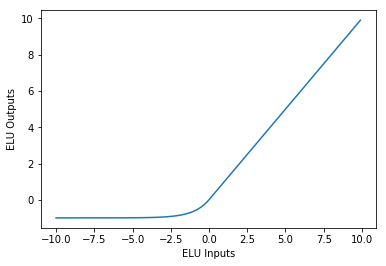

In [7]:
# 导入numpy科学运算库
import numpy as np                  
# 导入matplotlib绘图库
import matplotlib.pyplot as plt     
# 导入math运算库
import math                         

# 魔法指令，让matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

def elu(x,alpha=1):
    a = x[x>0]
    b = alpha*(math.e**(x[x<0])-1)
    result=np.concatenate((b,a),axis=0)
    return result
 
elu_inputs = np.arange(-10,10,0.1)
elu_outputs = elu(elu_inputs)
 
plt.plot(elu_inputs,elu_outputs)
plt.xlabel("ELU Inputs")
plt.ylabel("ELU Outputs")
plt.show()

### 8. maxout 函数

**Maxout** 是对 **ReLU** 和 **LeakyRelu** 的一般化归纳，他的数学形式如下（二维时）——

$$
\operatorname{Maxout}(x)=\max \left(w_{1}^{T} x+b_{1}, W_{2}^{T} x+b_{2}\right)
$$

**Maxout** 的拟合能力是非常强的，任意的凸函数都可以由分段线性函数以任意精度拟合，而 **Maxout** 又是取 k 个隐隐含层节点的最大值，因此理论 上**Maxout** 可以拟合任意的的凸函数。这些隐隐含层节点也是线性的，所以在不同的取值范围下，最大值也可以看做是分段线性的（分段的个数与 k 值有关）。和 **ReLU** 对比，它每个神经元的参数数量增加了一倍，这就导致整体参数的数量激增。

### 实验小结

在本实验中，我们介绍了深度学习中常用的激活函数（仅仅是其中一部分）我们稍微总结一下上面的几个激活函数。尽管 **ReLU** 激活函数有许多改进的版本，但最常用的一种还是 **ReLU** 本身。当您不知道如何选择激活功能时，基本上可以通过选择 **ReLU** 来很好地工作。下图为主要的激活函数小结 ——

<img src="./img/af_03.png" width="70%">

#### 如何评价激活函数的关键属性？

1. **非线性：** 即导数不是常数。激活函数是多层神经网络的基础，保证多层网络不退化成单层线性网络。这也是激活函数的意义所在。
2. **几乎处处可微：** 可微性保证了在优化中梯度的可计算性。传统的激活函数如 **sigmoid** 等满足处处可微。对于分段线性函数比如 **ReLU**，只满足几乎处处可微（即仅在有限个点处不可微）。对于 **SGD** 算法来说，由于几乎不可能收敛到梯度接近零的位置，有限的不可微点对于优化结果不会有很大影响。
3. **计算简单：** 非线性函数有很多。极端的说，一个多层神经网络也可以作为一个非线性函数，类似于 Network In Network 中把它当做卷积操作的做法。但激活函数在神经网络前向的计算次数与神经元的个数成正比，因此简单的非线性函数自然更适合用作激活函数。这也是 **ReLU** 一系比其它使用 **Exp** 等操作的激活函数更受欢迎的其中一个原因。
4. **非饱和性（saturation）：** 饱和指的是在某些区间梯度接近于零（即梯度消失），使得参数无法继续更新的问题。最经典的例子是 **Sigmoid**，它的导数在 x 为比较大的正值和比较小的负值时都会接近于 0。更极端的例子是 **阶跃函数**，由于它在几乎所有位置的梯度都为 0，因此处处饱和，无法作为激活函数。**ReLU** 在 x>0 时导数恒为 1，因此对于再大的正值也不会饱和。但同时对于 x<0，其梯度恒为 0，这时候它也会出现饱和的现象（在这种情况下通常称为神经元死亡问题）。**Leaky ReLU** 和 **PReLU** 的提出正是为了解决这一问题。
5. **单调性（monotonic）：** 即导数符号不变。这个性质大部分激活函数都有，除了诸如 **sin**、**cos** 等。单调性使得在激活函数处的梯度方向不会经常改变，从而让训练更容易收敛。
6. **输出范围有限：** 有限的输出范围使得网络对于一些比较大的输入也会比较稳定，这也是为什么早期的激活函数都以此类函数为主，如 **Sigmoid**、**Tanh**。但这导致了前面提到的梯度消失问题，而且强行让每一层的输出限制到固定范围会限制其表达能力。因此现在这类函数仅用于某些需要特定输出范围的场合，比如概率输出（此时 **loss** 函数中的 **log** 操作能够抵消其梯度消失的影响）、LSTM 里的 **gate** 函数。
7. **接近恒等变换（identity）：** 即约等于 x。这样的好处是使得输出的幅值不会随着深度的增加而发生显著的增加，从而使网络更为稳定，同时梯度也能够更容易地回传。这个与非线性是有点矛盾的，因此激活函数基本只是部分满足这个条件，比如 **Tanh** 只在原点附近有线性区（在原点为 0 且在原点的导数为 1），而 **ReLU** 只在 x>0 时为线性。这个性质也让初始化参数范围的推导更为简单。这种恒等变换的性质也被其他一些网络结构设计所借鉴，比如 CNN 中的 ResNet 和 RNN 中的 LSTM。
8. **参数少：** 大部分激活函数都是没有参数的。像 **PReLU** 带单个参数会略微增加网络的大小。还有一个例外是 **Maxout**，尽管本身没有参数，但在同样输出通道数下 k 路 **Maxout** 需要的输入通道数是其它函数的 k 倍，这意味着神经元数目也需要变为 k 倍；但如果不考虑维持输出通道数的情况下，该激活函数又能将参数个数减少为原来的 k 倍。
9. **归一化（normalization）：** 这个是最近才出来的概念，对应的激活函数是 **SELU**，主要思想是使样本分布自动归一化到零均值、单位方差的分布，从而稳定训练。在这之前，这种归一化的思想也被用于网络结构的设计，比如 Batch Normalization